<a href="https://colab.research.google.com/github/DomingosN/Ciencia-da-dados-aplicada-as-Organiza-es-/blob/master/Clutering_e_kNN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratório de Dados com Python o Dataset Iris

Este notebook é inspeado livrenete em diversos nottebooks que você pode encontrar em sites como Kaggle ou Github. Mas serev como uma boa referencia para entender como realizar uma Exploratory Data Analisys - EDA (Análise Exploratória de dados)

In [3]:
# importando pandas, e outros modulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import sys
#!{sys.executable} -m pip install -U scikit-learn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dir = os.getcwd() 
# Carregando odataset do um diretório do notebook
iris = pd.read_csv('Iris.csv') # Agora o dataset iris é um Pandas DataFrame

# uma primeir olhada nos dados
iris.head(10)#O método head(n) permite que você veja o começo de um dataframe, o parêtro n define o núemro de linhas serem exibidas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# confirmando o número de amostras e de cada espécie
print (iris['Species'].count())
print (iris['Species'].value_counts())

150
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


In [6]:
# Vamos ver as colunas do dataset
iris.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

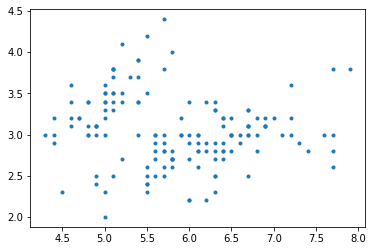

In [7]:
# criando um scatter plot de atributos com o Matplotib 
plt.plot(iris['SepalLengthCm'],iris["SepalWidthCm"],marker='.',linestyle='none')
plt.show()

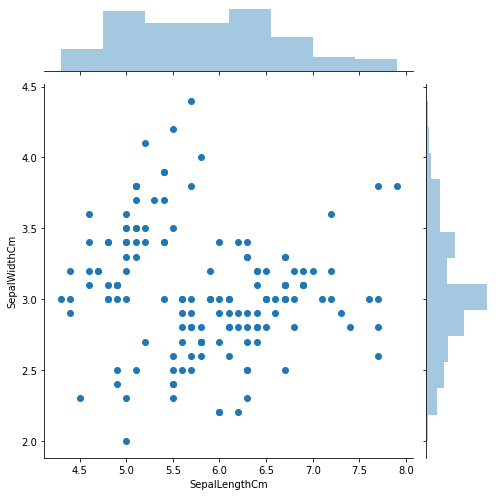

In [8]:
# Usando seaborn para criar algo similar
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=7)

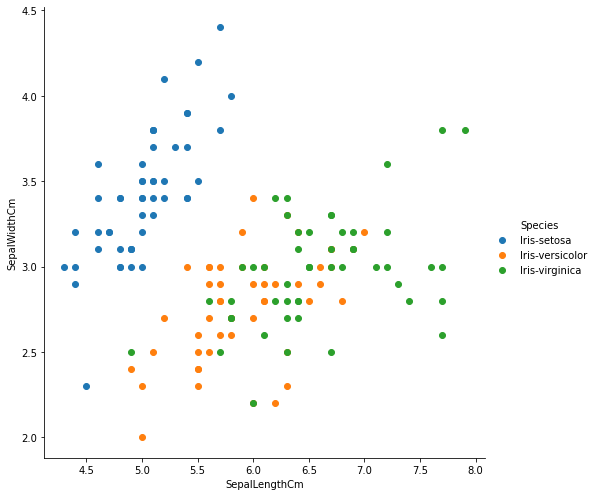

In [9]:
# usando FacetGrid do Seaborn para criar uma scatterplot colorida conforme o atributo species
sns.FacetGrid(iris, hue="Species", size=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

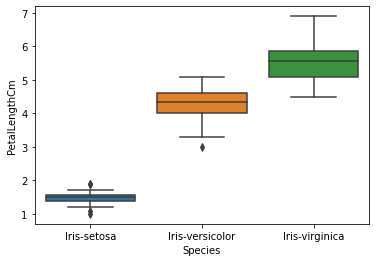

In [10]:
# Um boxplot de atributos  com o seaborn é bem útil para comparar atributos em grupos de interesse
sns.boxplot(x="Species", y="PetalLengthCm", data=iris);

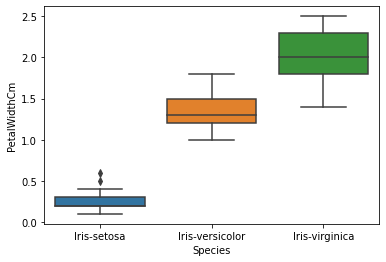

In [11]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

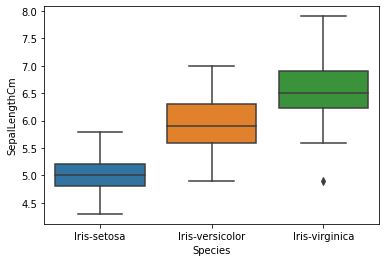

In [12]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

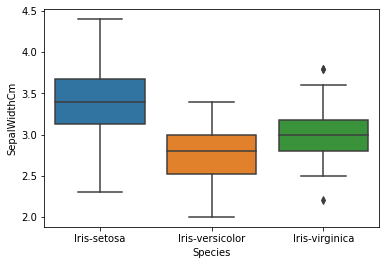

In [13]:
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

* desde o início, podemos ver que, usando o recurso de comprimento e largura de pétalas, podemos facilmente identificar setosa das outras espécies. *

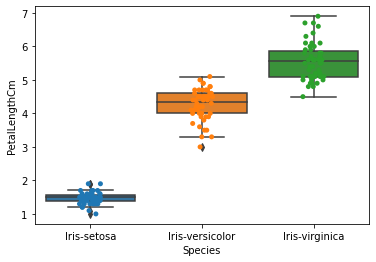

In [14]:
# usando a função striplot do Seaborn adiciona uma camada de pontos individuais
# setting jitter = True garante que nem todos os pontos caiam na mesma linha
# Salvar os eixos resultantes como eixo sempre faz com que o gráfico resultante seja mostrado
# em cima dos eixos anteriores (isso é uma coisa interessante de aprender :)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

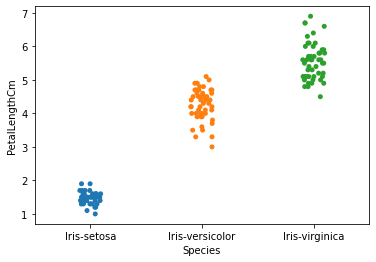

In [15]:

#ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

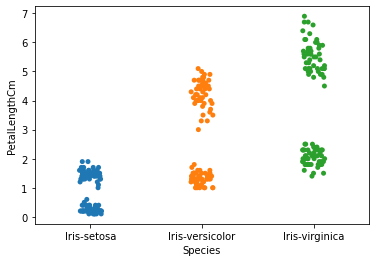

In [16]:

ax = sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray")
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

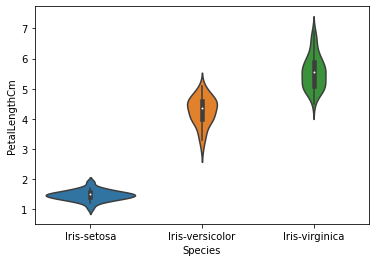

In [17]:
# Um gráfico de violino combina os benefícios dos dois gráficos anteriores e os simplifica. 
# As regiões mais densas dos dados são mais gordas e mais esparsas em um gráfico de violino

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

In [0]:
# Divida o conjunto de dados da íris em um trem e teste
dfX = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
dfy = iris['Species']

In [0]:
X = dfX.values
y=dfy.values

In [0]:
# importar o módulo para separar o conjunto de dados em conjuntos de teste e treinamento.
from sklearn.model_selection import train_test_split
# Divida o conjunto de dados da íris em um trem e teste
X_train, X_test, y_train, y_test=train_test_split(X, y,random_state=0,train_size=0.75)

In [0]:
# Vamos importar o módulo KMeans
from sklearn.cluster import KMeans

In [0]:
# importar o módulo para separar o conjunto de dados em conjuntos de teste e treinamento.
from sklearn.model_selection import train_test_split

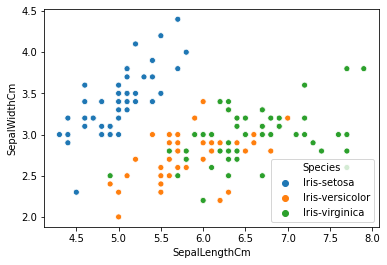

In [23]:
sns.scatterplot(dfX.SepalLengthCm,dfX.SepalWidthCm,hue=dfy)

In [24]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [25]:
print(km.cluster_centers_)

[[5.84390244 2.7097561  4.32926829 1.40731707]
 [4.9972973  3.38918919 1.45405405 0.23783784]
 [6.90588235 3.09705882 5.70294118 2.07058824]]


In [0]:
centers = pd.DataFrame(km.cluster_centers_, columns=dfX.columns)

In [27]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.843902,2.709756,4.329268,1.407317
1,4.997297,3.389189,1.454054,0.237838
2,6.905882,3.097059,5.702941,2.070588


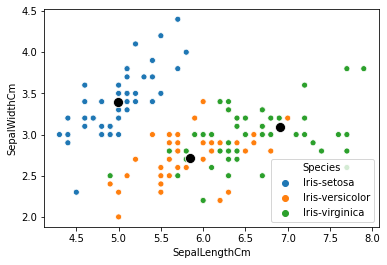

In [28]:
sns.scatterplot(dfX.SepalLengthCm,dfX.SepalWidthCm,hue=dfy)
sns.scatterplot(centers.SepalLengthCm, centers.SepalWidthCm, color = 'k', s=100)

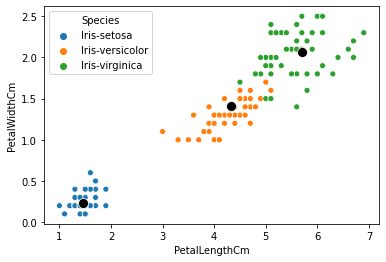

In [29]:
sns.scatterplot(dfX.PetalLengthCm,dfX.PetalWidthCm,hue=dfy)
sns.scatterplot(centers.PetalLengthCm, centers.PetalWidthCm, color = 'k', s=100)

In [0]:
y_hat = km.predict(X_test)

In [0]:
results = pd.DataFrame([y_test,y_hat]);
results = results.T
results.columns = ['y_test','y_hat']

## Plotagem o cluster hierárquico como um dendograma.

O dendrograma ilustra como cada cluster é composto desenhando um link em forma de U entre um cluster não singleton e seus filhos. A parte superior do link em U indica uma mesclagem de cluster. As duas pernas do link em U indicam quais clusters foram mesclados. O comprimento das duas pernas do link em U representa a distância entre os clusters filhos. É também a distância copenética entre observações originais nos dois grupos de crianças.

In [0]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

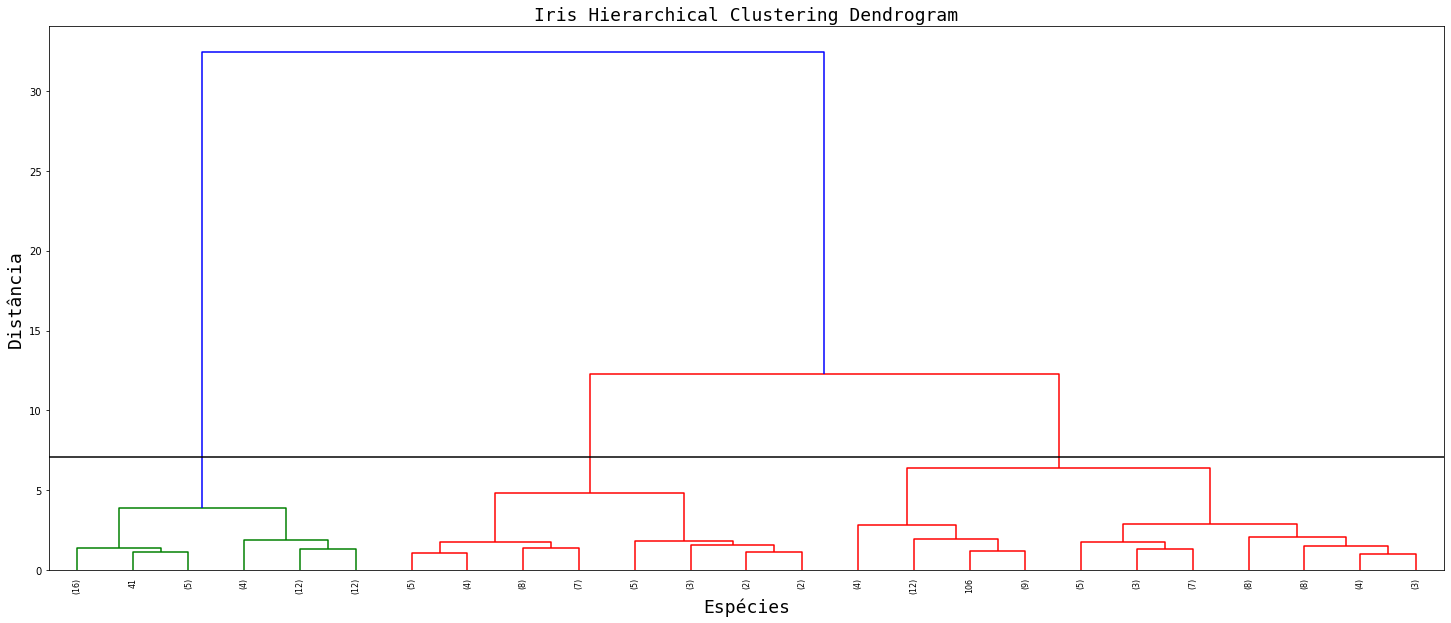

In [33]:
# generate the linkage matrix
Z = linkage(dfX, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
fontparams = {'size':18,'fontweight':'light',
              'family':'monospace','style':'normal'}
plt.title('Iris Hierarchical Clustering Dendrogram', fontparams)
plt.xlabel('Espécies', fontparams)
plt.ylabel('Distância', fontparams)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)

plt.axhline(y=max_d, c='k')
plt.show()